## IN4640 Assignment 1
### Intensity Transformations and Neighborhood Filtering
### Task 01

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

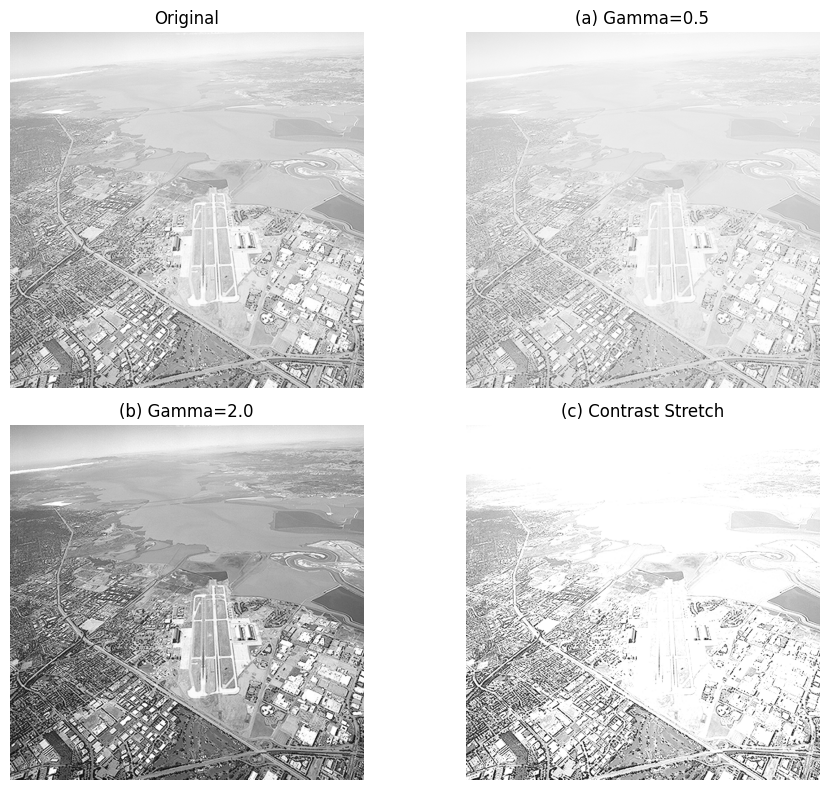

In [ ]:
img_path = 'assets/runway.png' 
if not os.path.exists(img_path):
    print(f"Error: File not found at {img_path}. Please check your src folder.")
else:
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    def apply_gamma(image, gamma):
        invGamma = gamma
        table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
        return cv2.LUT(image, table)

    def contrast_stretching(image, r1=0.2, r2=0.8):
        
        r = image / 255.0
        
        s = np.zeros_like(r)
        
        s[r < r1] = 0
        
        mask = (r >= r1) & (r <= r2)
        s[mask] = (r[mask] - r1) / (r2 - r1)
        
        s[r > r2] = 1
        
        return (s * 255).astype(np.uint8)

    res_a = apply_gamma(img, 0.5)

    res_b = apply_gamma(img, 2.0)

    res_c = contrast_stretching(img, 0.2, 0.8)

    titles = ['Original', '(a) Gamma=0.5', '(b) Gamma=2.0', '(c) Contrast Stretch']
    images = [img, res_a, res_b, res_c]

    plt.figure(figsize=(10, 8))
    for i in range(4):
        plt.subplot(2, 2, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')

    plt.tight_layout()
    plt.show()